# Exercise 3 : Exploratory Analysis

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

## Problem 1 : Analysis of Numeric Variables

In [6]:
data = pd.read_csv('../Data/train.csv')
houseData = pd.DataFrame(data[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'SalePrice']])
houseData.head()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
0,8450,1710,856,548,208500
1,9600,1262,1262,460,181500
2,11250,1786,920,608,223500
3,9550,1717,756,642,140000
4,14260,2198,1145,836,250000


#### a) Check the individual statistical description and visualize the statistical distributions of each of these variables.


In [7]:
houseData.describe()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1515.463699,1057.429452,472.980137,180921.195890
std,9981.264932,525.480383,438.705324,213.804841,79442.502883
min,1300.000000,334.000000,0.000000,0.000000,34900.000000
25%,7553.500000,1129.500000,795.750000,334.500000,129975.000000
50%,9478.500000,1464.000000,991.500000,480.000000,163000.000000
75%,11601.500000,1776.750000,1298.250000,576.000000,214000.000000
max,215245.000000,5642.000000,6110.000000,1418.000000,755000.000000


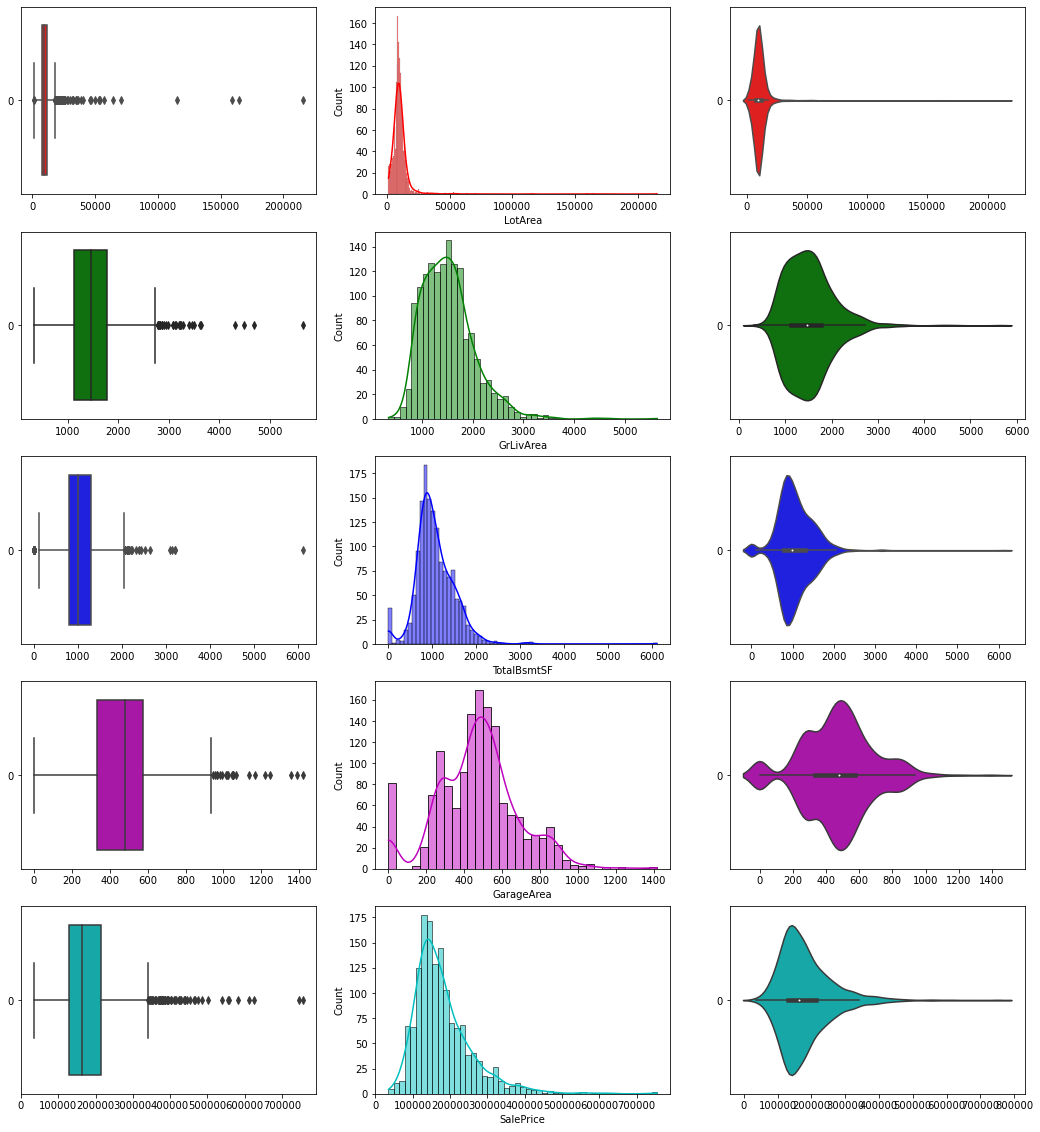

In [17]:
f , axes = plt.subplots(5,3 , figsize = (18,20)) 
colors = ["r", "g", "b", "m", "c"] 

count = 0
for features in houseData: 
    sb.boxplot(data=houseData[features] ,orient='h', ax=axes[count,0],color=colors[count])
    sb.histplot(data=houseData[features] ,kde = True , ax=axes[count,1],color=colors[count])
    sb.violinplot(data=houseData[features] , orient='h', ax=axes[count,2],color=colors[count])
    count += 1

#### b) Does it look like 'Normal Distribution' Which one has maximum outliers?

In [28]:
for features in houseData:
    outlier = []
    Q1 = np.percentile(houseData[features], 25, interpolation = 'midpoint')  
    Q2 = np.percentile(houseData[features], 50, interpolation = 'midpoint')  
    Q3 = np.percentile(houseData[features], 75, interpolation = 'midpoint') 
    IQR = Q3 - Q1
    low_lim = Q1 - 1.5 * IQR 
    up_lim = Q3 + 1.5 * IQR
    for x in houseData[features]: 
        if ((x > up_lim) or (x < low_lim)):
            outlier.append(x)
    print(features ,'outlier: ', x) 

LotArea outlier:  9937
GrLivArea outlier:  1256
TotalBsmtSF outlier:  1256
GarageArea outlier:  276
SalePrice outlier:  147500


most outliers : SalePrice

#### c) Check the relationship amongst the variables using mutual correlation and the correlation heatmap.

In [30]:
correlations = houseData.corr()
print(correlations)

              LotArea  GrLivArea  TotalBsmtSF  GarageArea  SalePrice
LotArea      1.000000   0.263116     0.260833    0.180403   0.263843
GrLivArea    0.263116   1.000000     0.454868    0.468997   0.708624
TotalBsmtSF  0.260833   0.454868     1.000000    0.486665   0.613581
GarageArea   0.180403   0.468997     0.486665    1.000000   0.623431
SalePrice    0.263843   0.708624     0.613581    0.623431   1.000000


<AxesSubplot:>

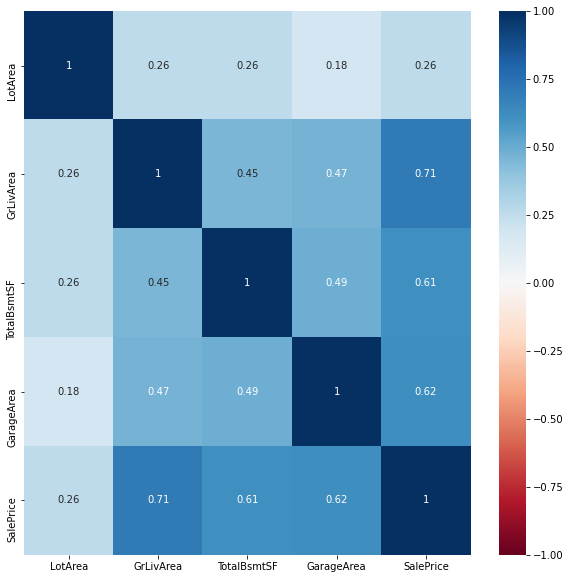

In [33]:
f , axes = plt.subplots(1,1,figsize=(10,10))
sb.heatmap(correlations , vmin = -1 , annot = True, cmap = 'RdBu')

#### d) Check the relationship amongst the variables using mutual jointplots and an overall pairplot. 

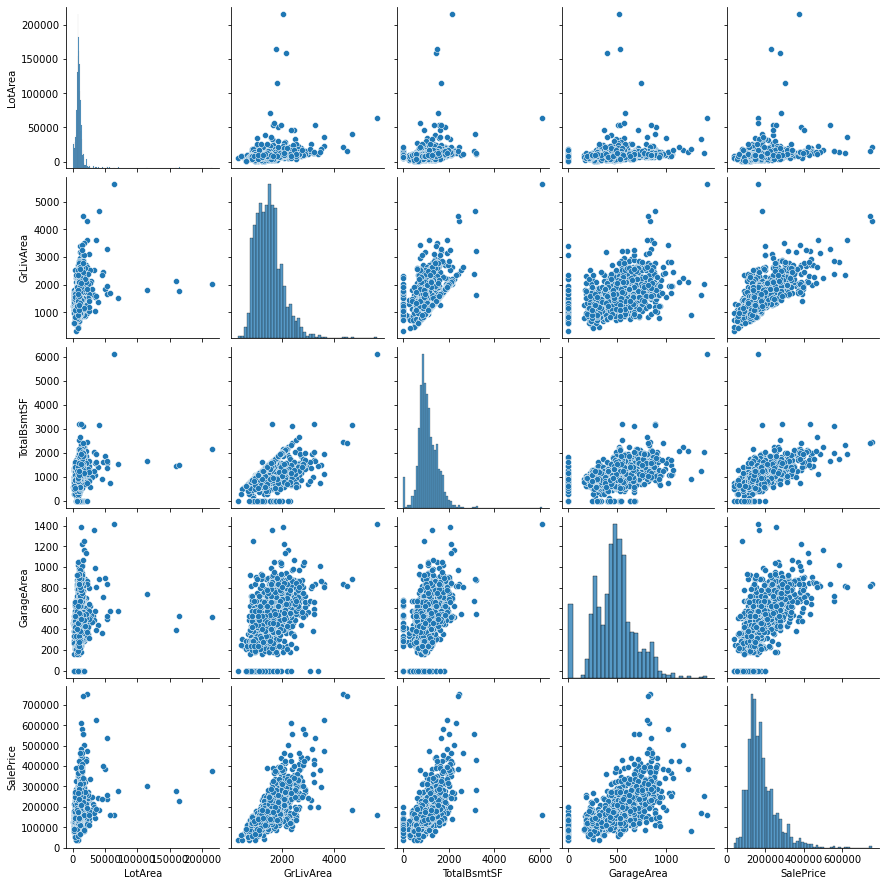

In [34]:
sb.pairplot(data = houseData)

GrLivArea : Possibly the most important variable : Highest Correlation, Strong Linearity
GarageArea and TotalBsmtSF : Important variables : High Correlation, Strong Linearity
LotArea : Doesn't seem so important as a variable : Low Correlation, Weak Linear Relation

## Problem 2 : Statistical Summary

In [37]:
houseCatData = pd.DataFrame(data[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']])
houseCatData.head()

,MSSubClass,Neighborhood,BldgType,OverallQual
0,60,CollgCr,1Fam,7
1,20,Veenker,1Fam,6
2,60,CollgCr,1Fam,7
3,70,Crawfor,1Fam,7
4,60,NoRidge,1Fam,8


#### a) Convert each of these variables into “category” data type

In [39]:
houseCatData['MSSubClass'] = houseCatData['MSSubClass'].astype('category')
houseCatData['Neighborhood'] = houseCatData['Neighborhood'].astype('category')
houseCatData['BldgType'] = houseCatData['BldgType'].astype('category')
houseCatData['OverallQual'] = houseCatData['OverallQual'].astype('category')

In [40]:
houseCatData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   MSSubClass    1460 non-null   category
 1   Neighborhood  1460 non-null   category
 2   BldgType      1460 non-null   category
 3   OverallQual   1460 non-null   category
dtypes: category(4)
memory usage: 8.0 KB


#### b) Check the individual statistical description and visualize the distributions (catplot) of each of these variables.

In [41]:
houseCatData.describe()

,MSSubClass,Neighborhood,BldgType,OverallQual
count,1460,1460,1460,1460
unique,15,25,5,10
top,20,NAmes,1Fam,5
freq,536,225,1220,397


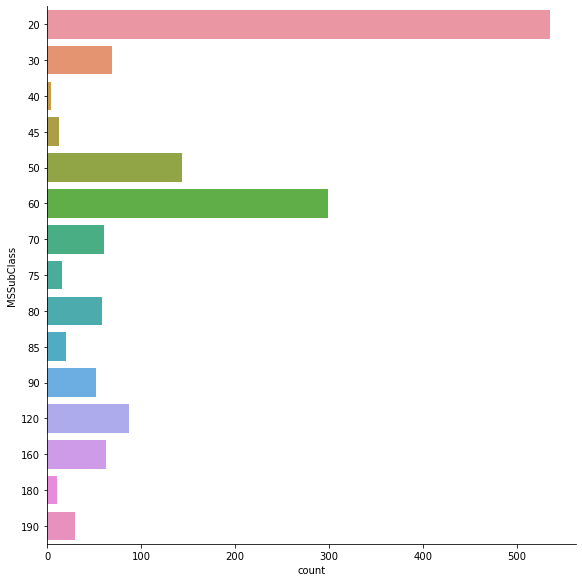

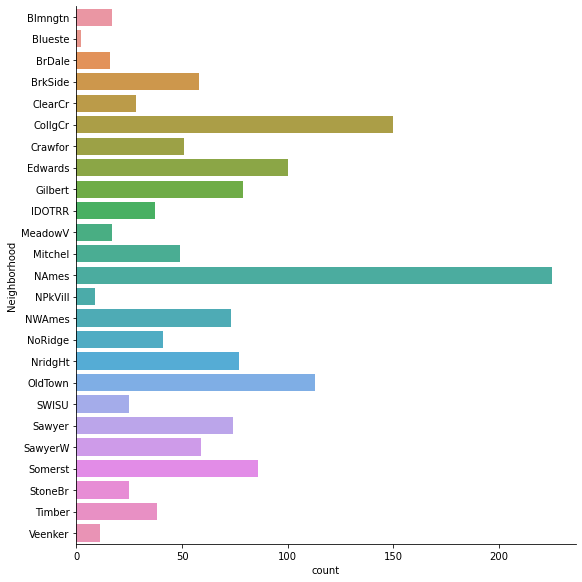

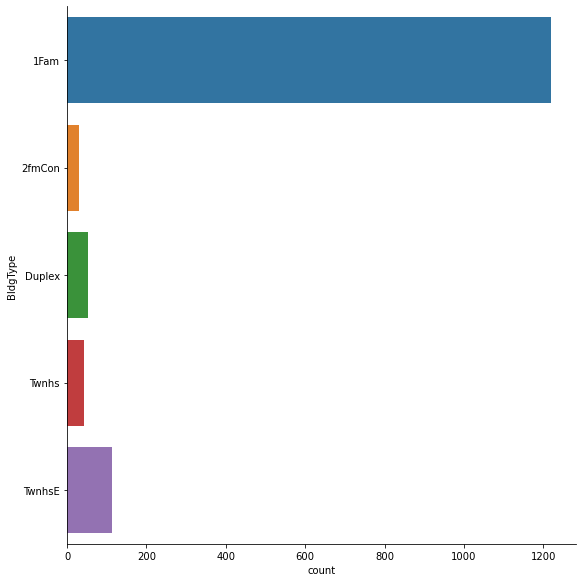

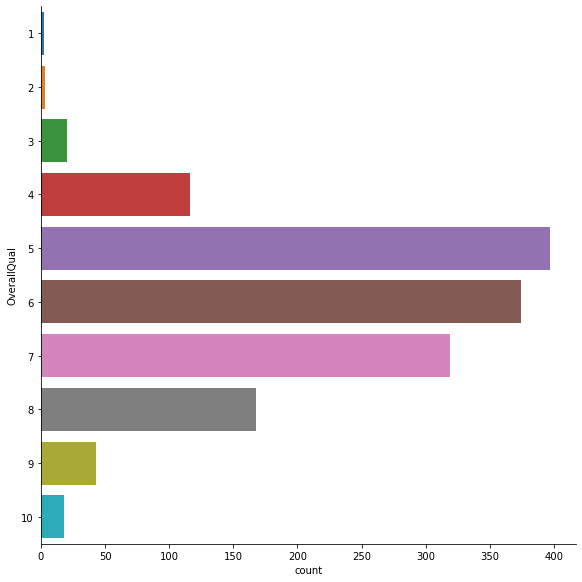

In [45]:
for features in houseCatData: 
    sb.catplot(y = features , data =houseCatData, height = 8, kind = 'count')

#### c) Check the relationship amongst the variables using bi-variate heatmap of counts.

<AxesSubplot:xlabel='MSSubClass', ylabel='BldgType'>

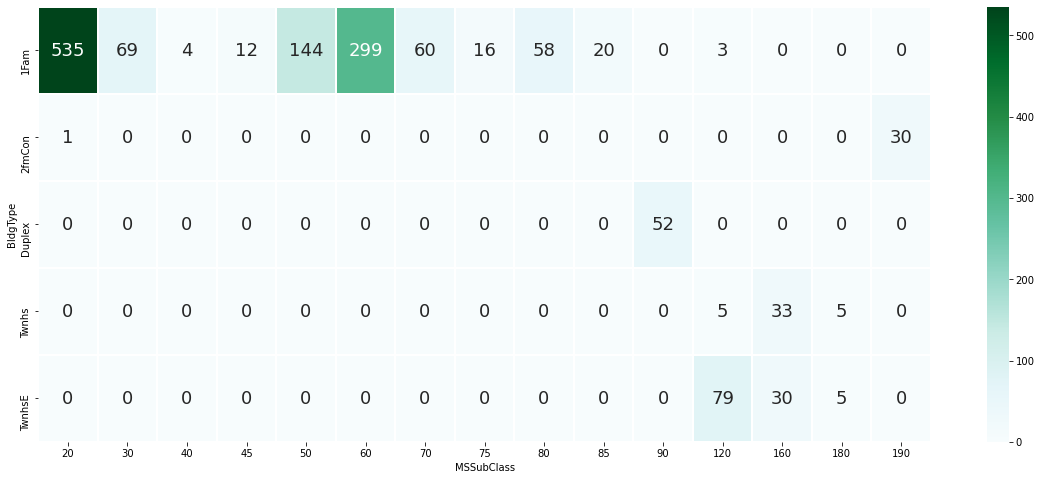

In [51]:
# Distribution of BldgType across MSSubClass
f, axes = plt.subplots(1, 1, figsize=(20, 8))
sb.heatmap(houseCatData.groupby(['BldgType', 'MSSubClass']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<AxesSubplot:xlabel='MSSubClass', ylabel='OverallQual'>

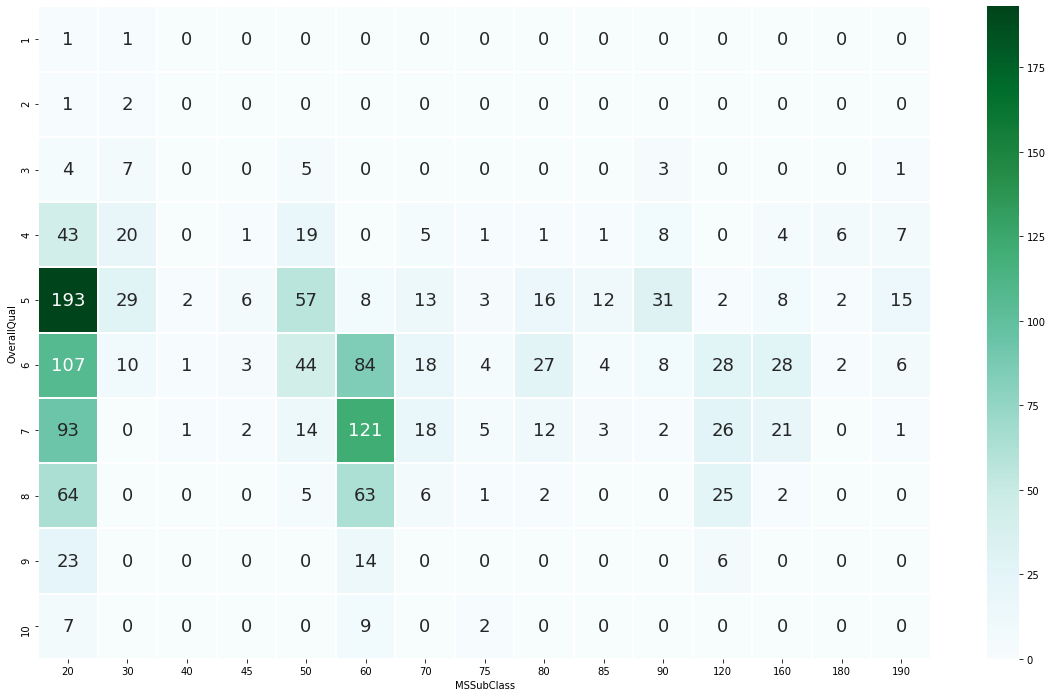

In [53]:
# Distribution of OverallQual across MSSubClass
f, axes = plt.subplots(1, 1, figsize=(20, 12))
sb.heatmap(houseCatData.groupby(['OverallQual', 'MSSubClass']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<AxesSubplot:xlabel='Neighborhood', ylabel='OverallQual'>

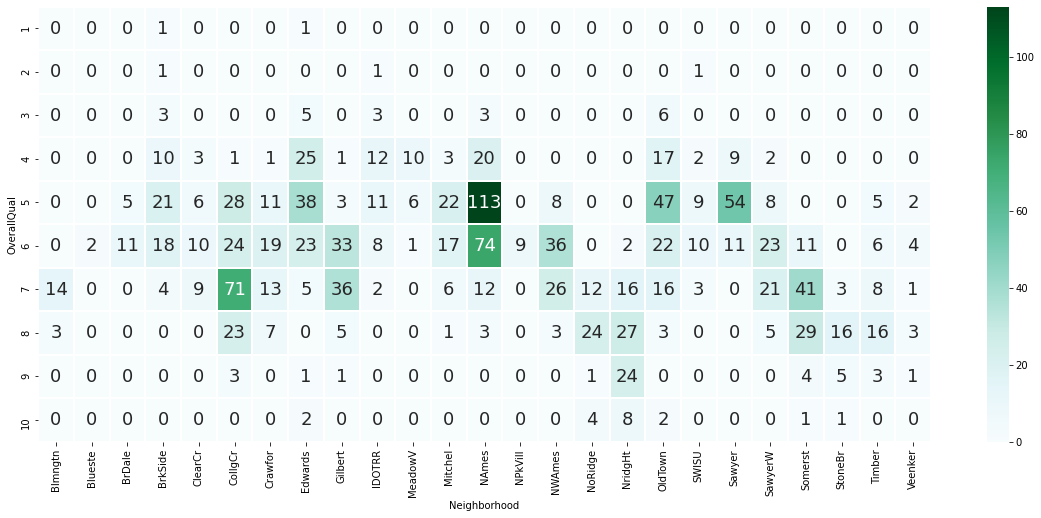

In [54]:
# Distribution of OverallQual across Neighborhood
f, axes = plt.subplots(1, 1, figsize=(20, 8))
sb.heatmap(houseCatData.groupby(['OverallQual', 'Neighborhood']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<AxesSubplot:xlabel='BldgType', ylabel='OverallQual'>

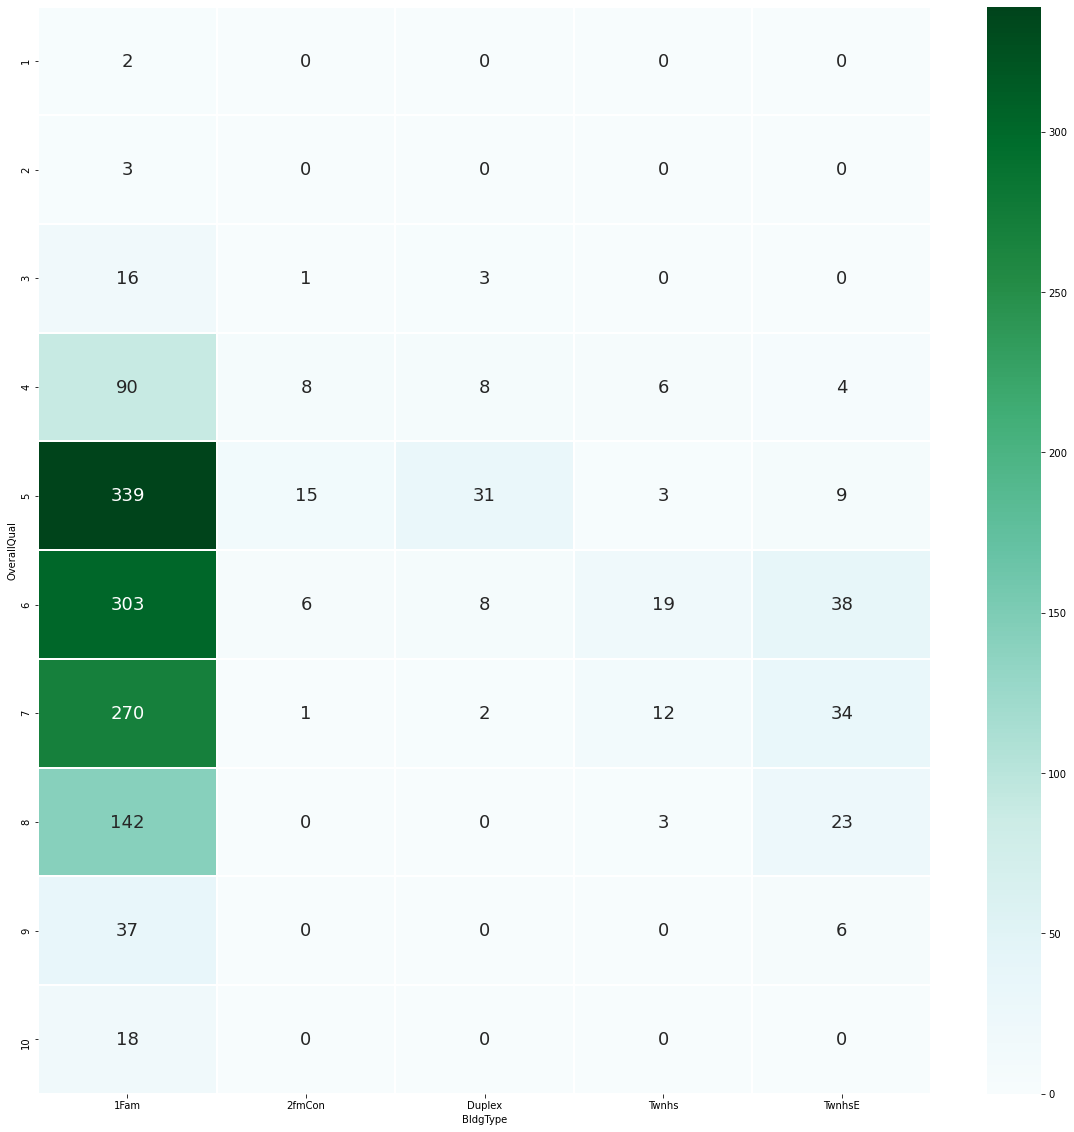

In [55]:
# Distribution of OverallQual across BldgType
f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(houseCatData.groupby(['OverallQual', 'BldgType']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

#### d) Draw boxplots of “SalePrice” against each of these categorical variables.

In [57]:
salePrice = pd.DataFrame(data['SalePrice'])
houseCatSale = pd.concat([houseCatData , salePrice] , axis = 1) 
houseCatSale.head()

,MSSubClass,Neighborhood,BldgType,OverallQual,SalePrice
0,60,CollgCr,1Fam,7,208500
1,20,Veenker,1Fam,6,181500
2,60,CollgCr,1Fam,7,223500
3,70,Crawfor,1Fam,7,140000
4,60,NoRidge,1Fam,8,250000


<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

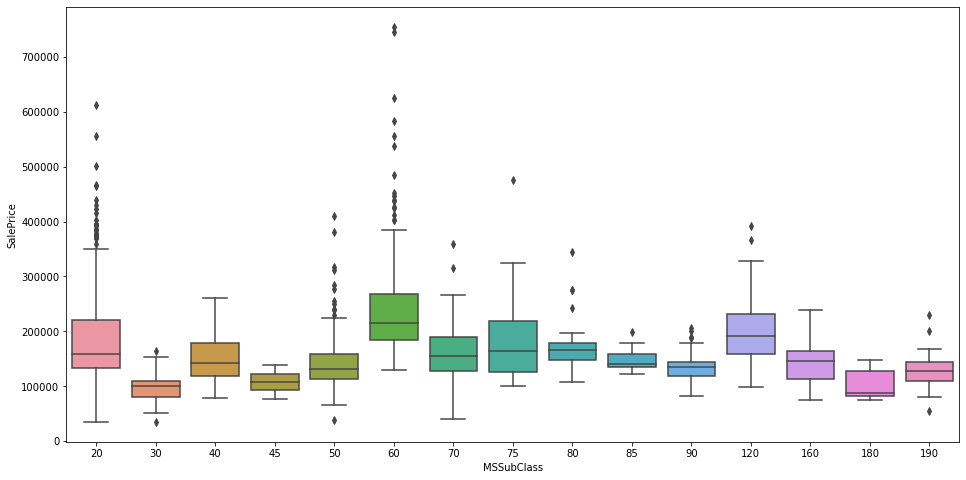

In [58]:
# SalePrice across different MSSubClass
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'MSSubClass', y = 'SalePrice', data = houseCatSale)

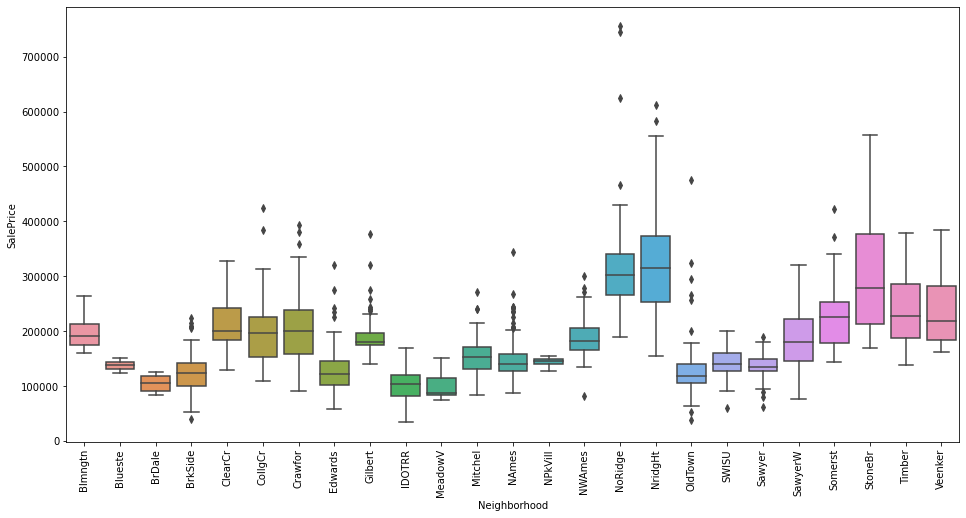

In [59]:
#SalePrice across different Neighborhood
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'Neighborhood', y = 'SalePrice', data = houseCatSale)
plt.xticks(rotation=90);

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

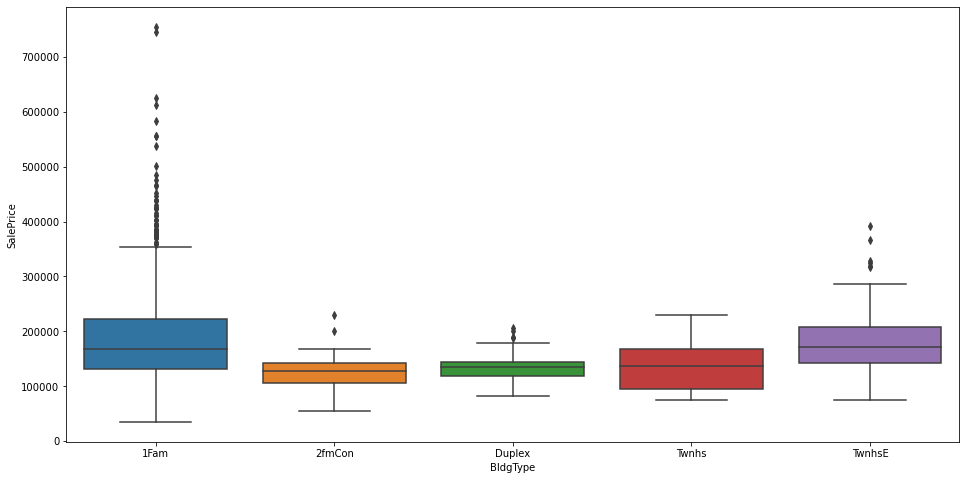

In [60]:
#SalePrice across different BldgType
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'BldgType', y = 'SalePrice', data = houseCatSale)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

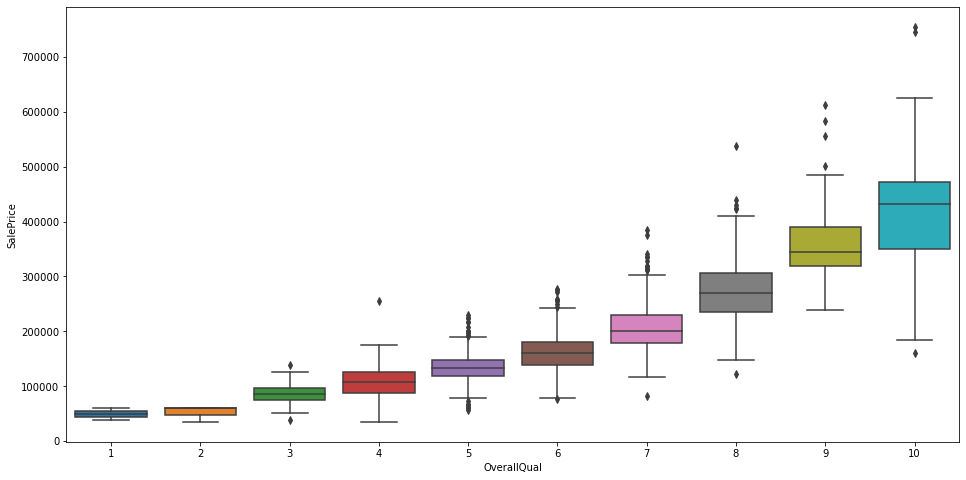

In [62]:
#SalePrice across OverallQual
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'OverallQual', y = 'SalePrice', data = houseCatSale)

OverallQual : Definitely the most important variable : Highest variation in SalePrice across the levels
Neighborhood and MSSubClass : Moderately important variables : Medium variation in SalePrice across levels
BldgType : Not clear if important as a variable at all : Not much variation in SalePrice across the levels